In [137]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Conv2D


In [138]:
seed = 0
# a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
# b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

# tensorflow, numpy 랜덤 값을 설정합니다.
tf.set_random_seed(seed)
np.random.seed(seed)

In [139]:
#doginfo.csv파일 데이터를 pandas를 이용해 읽어옵니다.
dog_data=pd.read_csv("doginfo_don't_touch.csv")
# dog_train=pd.read_csv("testDog2.csv")
kindCd=pd.read_csv("kindCd.csv")

dog_data = dog_data.dropna(axis=0)
# dog_train = dog_train.dropna(axis=0)
kindCd_data = kindCd.dropna(axis=0)

dog_data
# print(dog_train)
# print(kindCd)

,kindNum,neuterYn,sexCd,weight,noticeDays,age2,processState
0,128.0,N,F,7.46,10,12,0
1,114.0,N,M,7.00,14,1,1
2,114.0,U,M,4.50,11,2,0
3,67.0,N,M,10.00,8,1,0
4,114.0,N,M,6.00,8,4,0
...,...,...,...,...,...,...,...
4995,114.0,U,F,11.30,7,3,0
4996,32.0,N,M,2.80,7,3,0
4997,114.0,N,F,7.00,8,1,0
4998,114.0,N,M,25.80,11,2,0


In [140]:
kindCd = np.array(kindCd_data, dtype = np.float64)
# kindCd_train=np.array(kindCd_data, dtype=np.float64)

kindCd = kindCd.reshape(177)
# kindCd_train=kindCd_train.reshape(177)
print(kindCd)
print(kindCd.shape)

[ 54.  56.  55. 118. 115.  37.  81. 204.  83.  82.  38.  39.  40.  43.
  42. 153.  41. 120. 155.  69.  71. 142.  93. 167.  70. 166.  94. 121.
 152.  73. 146.  72. 159.  76.  75.  79.  78.  77.  74.  80. 114. 133.
  12.  17.  15. 164. 157. 148.  16.  20.  21.  22.  24. 208.  23.  26.
  27. 169.  25.  19.  13.  18.  14. 162.  85.  96.  95.   1.  34. 104.
  31.  99. 122. 123.  97. 132. 105. 154. 124. 100. 103. 151. 139. 101.
 102.  98. 136. 202. 160. 203.   8. 131.   9. 119. 150. 210.  57.  58.
  59.   6.   4.   7.   5. 143.  11.  10. 137.  84. 163. 112. 113. 149.
 211. 110. 205. 108. 109.  60.  46.  47.  44.  45.  53.  62.  61.  52.
 165.  51. 156. 129.  67.  35.  33.  32. 158. 144.  30.  29.  64. 207.
  28.   2.  68. 125. 141. 145.  36.  66.  65.  63. 140. 107. 106. 209.
  86.  88.  90.  87. 138.  89. 126. 127. 128.  91.   3. 161.  50. 168.
  49. 147.  92.  48. 135. 206. 130. 134. 111.]
(177,)


In [141]:
# kindNum을 원핫 인코딩
kindCd = pd.concat((pd.get_dummies(dog_data.kindNum, columns=kindCd), pd.DataFrame(columns=kindCd))).fillna(0)
# kindCd

# 학습데이터에서 kindNum 열을 삭제한 후, 원핫 인코딩된 kindCd를 붙임
dog_data.drop(['kindNum'], axis='columns', inplace=True)
dog_data = pd.concat([dog_data, kindCd], axis=1)


# kindNum을 원핫 인코딩
# kindCd_train = pd.concat((pd.get_dummies(dog_train.kindNum, columns=kindCd_train), pd.DataFrame(columns=kindCd_train))).fillna(0)

# # 테스트데이터에서 kindNum 열을 삭제한 후, 원핫 인코딩된 kindCd를 붙임
# dog_train.drop(['kindNum'], axis='columns', inplace=True)
# dog_train = pd.concat([dog_train, kindCd_train], axis=1)
dog_data
# dog_train

,neuterYn,sexCd,weight,noticeDays,age2,processState,1.0,2.0,3.0,4.0,...,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0
0,N,F,7.46,10,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N,M,7.00,14,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U,M,4.50,11,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,M,10.00,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N,M,6.00,8,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,U,F,11.30,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,N,M,2.80,7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,N,F,7.00,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,N,M,25.80,11,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        data = data.drop(column, axis = 1)
    return data

In [143]:
dummy_columns = ["neuterYn", "sexCd"]
data = dummy_data(dog_data, dummy_columns)
# train_data = dummy_data(dog_train, dummy_columns)
data.head()
# train_data.head()
# print(type(dog_data))
# print(type(data))

print(data)

data = np.array(data, dtype = np.float64)
# train_data = np.array(train_data, dtype = np.float64)

# data
# print(data.shape)
# print(len(train_data))
# print(train_data.shape)
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')

      weight  noticeDays  age2  processState  1.0  2.0  3.0  4.0  5.0  6.0  \
0       7.46          10    12             0    0    0    0    0    0    0   
1       7.00          14     1             1    0    0    0    0    0    0   
2       4.50          11     2             0    0    0    0    0    0    0   
3      10.00           8     1             0    0    0    0    0    0    0   
4       6.00           8     4             0    0    0    0    0    0    0   
...      ...         ...   ...           ...  ...  ...  ...  ...  ...  ...   
4995   11.30           7     3             0    0    0    0    0    0    0   
4996    2.80           7     3             0    0    0    0    0    0    0   
4997    7.00           8     1             0    0    0    0    0    0    0   
4998   25.80          11     2             0    0    0    0    0    0    0   
4999    3.50          20     1             1    0    0    0    0    0    0   

      ...  208.0  209.0  210.0  211.0  neuterYn_N  neuterYn_U  

In [144]:
a = train[:, :3]
b = train[:, 4:]

# print(a[0,:])
# print(b)

#numpy 배열에서 데이터 변화요인(kindCd, neuterYn, sexCd, weight, noticeDays, age2)으로 사용할 데이터를 뽑아냅니다.
xData = np.concatenate([a, b], axis = 1)

a = test[:, :3]
b = test[:, 4:]
testX = np.concatenate([a, b], axis = 1)

a = val[:, :3]
b = val[:, 4:]
valX = np.concatenate([a, b], axis = 1)

print(xData)
type(xData)
xData.shape
testX.shape

[[ 2.4  10.    0.   ...  0.    1.    0.  ]
 [25.   11.    4.   ...  0.    1.    0.  ]
 [ 1.77 11.    0.   ...  1.    0.    0.  ]
 ...
 [ 2.   12.    0.   ...  1.    0.    0.  ]
 [ 3.   12.    2.   ...  0.    1.    0.  ]
 [ 0.8   9.    0.   ...  1.    0.    0.  ]]


(1000, 186)

In [145]:
#numpy배열에서 결과(입양여부)로 사용할 데이터를 뽑아냅니다.
yData=train[:,[3]]
testY = test[:,[3]]
valY = val[:,[3]]

# yData = yData.astype('int32')
print(yData)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]


In [146]:
from tensorflow.keras.optimizers import Adadelta, Adam, SGD, RMSprop, Adagrad, Nadam
from tensorflow.keras.regularizers import l2
from sklearn import preprocessing

# mm_scaler = preprocessing.MinMaxScaler()#0.5654
# mm_scaler = preprocessing.StandardScaler()#0.6159
# mm_scaler = preprocessing.MaxAbsScaler()#0.5860
mm_scaler = preprocessing.RobustScaler()#0.6900

xData = mm_scaler.fit_transform(xData)
testX = mm_scaler.fit_transform(testX)
valX = mm_scaler.fit_transform(valX)

Train on 3197 samples, validate on 800 samples
Epoch 1/100
3197/3197 [==============================] - 3s 815us/sample - loss: 0.7117 - acc: 0.5755 - binary_crossentropy: 0.7117 - val_loss: 0.6671 - val_acc: 0.6463 - val_binary_crossentropy: 0.6671
Epoch 2/100
3197/3197 [==============================] - 1s 169us/sample - loss: 0.6400 - acc: 0.6390 - binary_crossentropy: 0.6400 - val_loss: 0.6509 - val_acc: 0.6550 - val_binary_crossentropy: 0.6509
Epoch 3/100
3197/3197 [==============================] - 1s 224us/sample - loss: 0.6269 - acc: 0.6691 - binary_crossentropy: 0.6269 - val_loss: 0.6413 - val_acc: 0.6550 - val_binary_crossentropy: 0.6413
Epoch 4/100
3197/3197 [==============================] - 1s 245us/sample - loss: 0.6157 - acc: 0.6697 - binary_crossentropy: 0.6157 - val_loss: 0.6338 - val_acc: 0.6562 - val_binary_crossentropy: 0.6338
Epoch 5/100
3197/3197 [==============================] - 1s 212us/sample - loss: 0.6113 - acc: 0.6650 - binary_crossentropy: 0.6113 - val_los

Epoch 41/100
3197/3197 [==============================] - 1s 162us/sample - loss: 0.5730 - acc: 0.7010 - binary_crossentropy: 0.5730 - val_loss: 0.6003 - val_acc: 0.6787 - val_binary_crossentropy: 0.6003
Epoch 42/100
3197/3197 [==============================] - 1s 164us/sample - loss: 0.5798 - acc: 0.6969 - binary_crossentropy: 0.5798 - val_loss: 0.5990 - val_acc: 0.6750 - val_binary_crossentropy: 0.5990
Epoch 43/100
3197/3197 [==============================] - 0s 149us/sample - loss: 0.5746 - acc: 0.6953 - binary_crossentropy: 0.5746 - val_loss: 0.6027 - val_acc: 0.6725 - val_binary_crossentropy: 0.6027
Epoch 44/100
3197/3197 [==============================] - 1s 159us/sample - loss: 0.5668 - acc: 0.6982 - binary_crossentropy: 0.5668 - val_loss: 0.6029 - val_acc: 0.6700 - val_binary_crossentropy: 0.6029
Epoch 45/100
3197/3197 [==============================] - 1s 224us/sample - loss: 0.5736 - acc: 0.6931 - binary_crossentropy: 0.5736 - val_loss: 0.6010 - val_acc: 0.6737 - val_binary_c

Epoch 81/100
3197/3197 [==============================] - 0s 156us/sample - loss: 0.5645 - acc: 0.7041 - binary_crossentropy: 0.5645 - val_loss: 0.6000 - val_acc: 0.6775 - val_binary_crossentropy: 0.6000
Epoch 82/100
3197/3197 [==============================] - 1s 210us/sample - loss: 0.5675 - acc: 0.6931 - binary_crossentropy: 0.5675 - val_loss: 0.5999 - val_acc: 0.6762 - val_binary_crossentropy: 0.5999
Epoch 83/100
3197/3197 [==============================] - 1s 176us/sample - loss: 0.5709 - acc: 0.7013 - binary_crossentropy: 0.5709 - val_loss: 0.6005 - val_acc: 0.6837 - val_binary_crossentropy: 0.6005
Epoch 84/100
3197/3197 [==============================] - 0s 150us/sample - loss: 0.5663 - acc: 0.7075 - binary_crossentropy: 0.5663 - val_loss: 0.6014 - val_acc: 0.6900 - val_binary_crossentropy: 0.6014
Epoch 85/100
3197/3197 [==============================] - 0s 147us/sample - loss: 0.5650 - acc: 0.6975 - binary_crossentropy: 0.5650 - val_loss: 0.6011 - val_acc: 0.6862 - val_binary_c

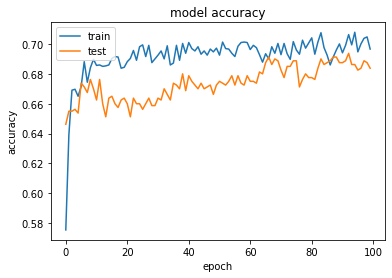

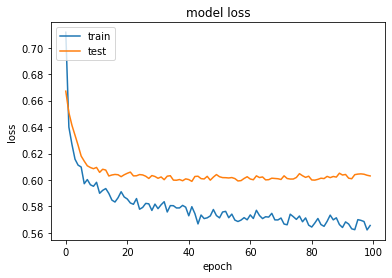

In [147]:
from keras import optimizers

model=Sequential()
# model.add(Dense(1, input_dim=9, activation='sigmoid'))


model.add(Dense(64, input_shape = (186, )))
model.add(BatchNormalization()) #0.6898
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)#0.6293
RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)#0.6339
# Adagrad = Adagrad(lr=0.01, epsilon=None, decay=0.0)#0.6161
# Adadelta = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)#0.6029
# Adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)#0.6249
# Nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)#0.6295


model.compile(optimizer='RMSprop' ,loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

hist = model.fit(xData,yData, batch_size=64, epochs=100, validation_data=(valX, valY), verbose=1)

# batch_size=64, epochs=100 ,64 128-> train, loss and metric : [0.6011693747656925, 0.68898153, 0.60116947]
# batch_size=64, epochs=100 ,16 32-> train, loss and metric : [0.5963284974039595, 0.6881036, 0.5963285]
# batch_size=64, epochs=200 -> train, loss and metric : [0.6229215715934144, 0.68437225, 0.6229214]

loss_and_metric = model.evaluate(testX, testY, batch_size = 64, verbose = 0)
print("train, loss and metric : {}".format(loss_and_metric))

## summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
## summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
# # L2규제만 #0.6843
# l2_model = Sequential([
#     Dense(16, kernel_regularizer=l2(0.01),
#                        activation=tf.nn.relu, input_shape=(186,)),
#     Dense(16, kernel_regularizer=l2(0.01),
#                        activation=tf.nn.relu),
#     Dense(1, activation=tf.nn.sigmoid)
# ])
# sgd=optimizers.SGD(lr=0.01)
# adam=optimizers.Adam(lr=0.01)
# RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

# l2_model.compile(optimizer='RMSprop',
#                  loss='binary_crossentropy',
#                  metrics=['accuracy', 'binary_crossentropy'])

# l2_model_history = l2_model.fit(xData, yData,
#                                 epochs=100,
#                                 batch_size=64,
#                                 validation_data=(valX, valY),
#                                 verbose=1)

# loss_and_metric = l2_model.evaluate(testX, testY, batch_size=64, verbose=0)
# print("train, loss and metric : {}".format(loss_and_metric))


In [144]:
# l2_model = keras.models.Sequential([
#     keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
#                        activation=tf.nn.relu, input_shape=(186,)),
#     keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
#                        activation=tf.nn.relu),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid)
# ])


def mlp_model():
    model = Sequential()

#     model = Sequential([
#     Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
#                        activation=tf.nn.relu, input_shape=(186,)),
#     Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
#                        activation=tf.nn.relu),
#     Dense(1, activation=tf.nn.sigmoid)
# ])

    model.add(Dense(16, input_shape = (9, )))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(32))
    model.add(Activation('relu'))
#     model.add(BatchNormalization())
#     model.add(Dense(32))
#     model.add(Activation('relu'))
#     model.add(Dense(50, input_shape = (186, )))
#     model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
#     model.add(Activation('sigmoid'))    
#     model.add(Dense(50))
#     model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
#     model.add(Activation('sigmoid'))    
#     model.add(Dense(50))
#     model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
#     model.add(Activation('sigmoid'))    
#     model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Dense(1))
    model.add(Activation('sigmoid'))   
#     model.add(Dropout(0.5))
#     model.add(Dense(1))
#     model.add(Activation('softmax'))

#     sgd=optimizers.SGD(lr=0.01, momentum=0.9)

    model.compile(optimizer=Adadelta(rho=0.95),
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
    return model

# mlp_model(l2_model)

# sgd=optimizers.SGD(lr=0.01)

# l2_model.compile(optimizer='sgd',
#                  loss='binary_crossentropy',
#                  metrics=['accuracy', 'binary_crossentropy'])

l2_model = mlp_model()

l2_model_history = l2_model.fit(xData, yData,
                                epochs=100,
                                shuffle = True,
                                batch_size=32,
                                validation_data=(testX, testY),
                                verbose=1)

l2_model.summary()

loss_and_metric = l2_model.evaluate(testX, testY, batch_size = 32, verbose = 0)
print("train, loss and metric : {}".format(loss_and_metric))


Train on 22792 samples, validate on 611 samples
Epoch 1/100
22792/22792 [==============================] - 1s 56us/sample - loss: 0.8675 - acc: 0.5316 - binary_crossentropy: 0.8675 - val_loss: 0.8734 - val_acc: 0.5254 - val_binary_crossentropy: 0.8734
Epoch 2/100
22792/22792 [==============================] - 1s 43us/sample - loss: 0.8615 - acc: 0.5330 - binary_crossentropy: 0.8615 - val_loss: 0.8591 - val_acc: 0.5303 - val_binary_crossentropy: 0.8591
Epoch 3/100
22792/22792 [==============================] - 1s 44us/sample - loss: 0.8526 - acc: 0.5377 - binary_crossentropy: 0.8526 - val_loss: 0.8585 - val_acc: 0.5286 - val_binary_crossentropy: 0.8585
Epoch 4/100
22792/22792 [==============================] - 1s 43us/sample - loss: 0.8478 - acc: 0.5365 - binary_crossentropy: 0.8478 - val_loss: 0.8535 - val_acc: 0.5368 - val_binary_crossentropy: 0.8535
Epoch 5/100
22792/22792 [==============================] - 1s 43us/sample - loss: 0.8399 - acc: 0.5392 - binary_crossentropy: 0.8399 - v

22792/22792 [==============================] - 1s 41us/sample - loss: 0.6818 - acc: 0.5893 - binary_crossentropy: 0.6818 - val_loss: 0.7064 - val_acc: 0.5630 - val_binary_crossentropy: 0.7064
Epoch 81/100
22792/22792 [==============================] - 1s 40us/sample - loss: 0.6813 - acc: 0.5914 - binary_crossentropy: 0.6813 - val_loss: 0.7039 - val_acc: 0.5630 - val_binary_crossentropy: 0.7039
Epoch 82/100
22792/22792 [==============================] - 1s 41us/sample - loss: 0.6796 - acc: 0.5890 - binary_crossentropy: 0.6796 - val_loss: 0.7063 - val_acc: 0.5679 - val_binary_crossentropy: 0.7063
Epoch 83/100
22792/22792 [==============================] - 1s 42us/sample - loss: 0.6826 - acc: 0.5899 - binary_crossentropy: 0.6826 - val_loss: 0.7046 - val_acc: 0.5614 - val_binary_crossentropy: 0.7046
Epoch 84/100
22792/22792 [==============================] - 1s 41us/sample - loss: 0.6821 - acc: 0.5858 - binary_crossentropy: 0.6821 - val_loss: 0.7033 - val_acc: 0.5630 - val_binary_crossentr

In [130]:
# for i in range(len(train_data)):
#     new_x=testX[i, :].reshape(1,186)
#     print('입양 확률 : %8.4f%%' % (l2_model.predict(new_x)*100))
l2_model.save('l2_model_yj')